## Regressao Linear 01

### Disciplina Inteligência Artificial

Neste jupyter vamos criar um modelo de regressão linear para estimar a probabilidade de admissões de pós-graduação.

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions


## Montando o Drive

In [ ]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregando o dataset

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

In [ ]:
# Carregando o Dataset Admission_Predict_Ver1.1.csv com o pacote Pandas, criando o DataFrame df
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Verificando os últimos registros do dataset
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Veja acima que a primeira coluna (Serial No.) podemos ignorar, pois é apenas uma chave e que não afeta a chance de admissão

In [ ]:
# Ignorando a primeia linha
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Veja acima que a primeira coluna foi removida

In [ ]:
# Vamos verificar se existem valores nulos
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Veja acima que não temos nenhum valor nulo

In [ ]:
# Imprimindo o describe()
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Como pode ser visto acima, temos 500 exemplos

In [ ]:
# Vamos verificar o nome das colunas
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Vamos renomear as colunas para remover espaços
df.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Vamos ver o Shape dos dados
print('Shape:',df.shape)

Shape: (500, 8)


Temos aqui 500 linhas com 8 colunas, entretanto a última coluna é a coluna TARGET (ALVO)

## Explorando o Dataset

In [ ]:
# Vamos explorar os dados de resultado
# Calculando a média da variável target
media_esperada = df['Chance_of_Admit'].mean()
media_esperada

0.7217399999999996

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f024e252400>]],
      dtype=object)

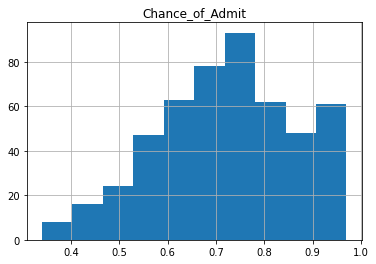

In [ ]:
# Histograma do target
df.hist(column='Chance_of_Admit')

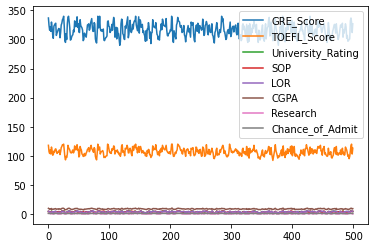

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

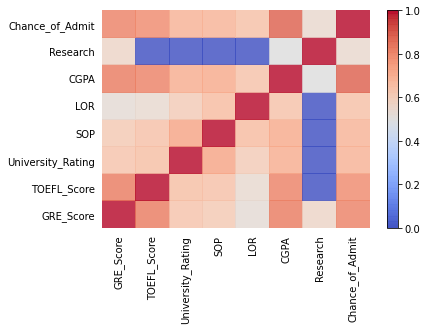

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis
matriz_corr = df.corr()
observations = len(df)
variables = df.columns
visualize_correlation_matrix(df, hurdle = 0.5)

Veja que as variáveis CGPA, GRE_Score e TOEFL_Score tem maior influência em Chance_of_Admit

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['Chance_of_Admit'].values

In [ ]:
# Imprimindo os primeiros valores de X
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45]


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(500, 7)
(500,)


In [ ]:
# Vamos agora calcular a covariância entre as variáveis
import statsmodels.regression.linear_model as sm
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              8178.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                        14:30:33   Log-Likelihood:                          635.01
No. Observations:                 500   AIC:                                     -1256.
Df Residuals:                     493   BIC:                                     -1227.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE_Score            -0.0030      0.000     -8.613      0.000      -0.004      -0.002
TOEFL_Score           0.0033      0.001      3.342      0.001       0.001       0.005
University_Rating     0.0166      0.004      3.935      0.000       0.008       0.025
SOP                   0.0082      0.005      1.584      0.114      -0.002       0.018
LOR                   0.0171      0.005      3.622      0.000       0.008       0.026
CGPA                  0.1340      0.011     12.205      0.000       0.112       0.156
Research              0.0561      0.007      8.099      0.000       0.042       0.070
==============================================================================
Omnibus:                       79.089   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.537
Skew:                          -0.979   Prob(JB):                     1.23e-28
Kurtosis:                       4.529   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explicação dos dados acima:

* std err: O erro padrão básico da estimativa do coeficiente. 
* t: O valor da estatística t. Esta é uma medida de quão estatisticamente significativo é o coeficiente.
* P> | t |: P-valor de que a hipótese nula de que o coeficiente = 0 é verdadeira. Se for menor que o nível de confiança, geralmente 0,05, indica que há uma relação estatisticamente significativa entre o termo e a resposta.

Podemos ver que CGPA é muito significativo

## Regressão Linear com 1 variável

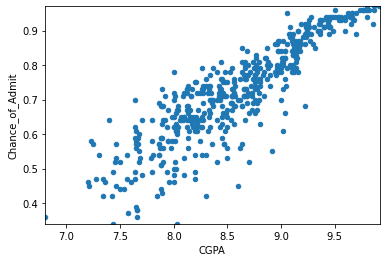

In [ ]:
# Vamos agora imprimir um scatter plot entre CGPA e o resultado (target)
# Definindo o range dos valores de x e y
VAR = 'CGPA'
TARGET = 'Chance_of_Admit'
x_range = [df[VAR].min(), df[VAR].max()]
y_range = [df[TARGET].min(), df[TARGET].max()]
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

In [ ]:
# Separando apenas a variável de interesse e fazendo o reshape
X_1 = X[VAR].values.reshape((len(df), 1))
print(X_1.shape)

(500, 1)


In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (400, 1)
y_train: (400,)
X_test: (100, 1)
y_test: (100,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Agora efetivamente treinamos o modelo com fit()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (100,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

Mean Squared Error (MSE): 0.004390763141599453
Mean Absolute Error (MAE): 0.04693610614269898
Score R2: 0.7284012605253238


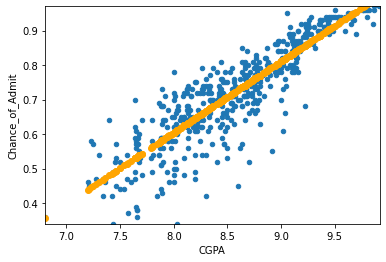

In [ ]:
# Plotando a linha de regressão para todos os dados

# Prevendo os valores de y para todos os dados
y_pred_all = lin_reg.predict(X_1)

# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = VAR, y = TARGET, xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df[VAR], y_pred_all, 'o', color = 'orange', linewidth = 2)

## Regressão Linear com mais variáveis

In [ ]:
# Vamos utilizar 3 variáveis
VAR = ['CGPA', 'GRE_Score', 'TOEFL_Score']
X_2 = X[VAR].values.reshape((len(df), 3))
print(X_2.shape)

(500, 3)


In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_2 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (400, 3)
y_train: (400,)
X_test: (100, 3)
y_test: (100,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#Agora efetivamente treinado o modelo com fit()
lin_reg.fit(X_train, y_train)

# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (100,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

Mean Squared Error (MSE): 0.0037164381231652357
Mean Absolute Error (MAE): 0.043273487627415855
Score R2: 0.7770388292729522


Veja que o uso de mais variáveis melhorou o modelo, pois o valor de R2 aumentou e os erros médios diminuíram. 

# Exercício 01 (Aula05_Parte1)

Você viu acima que o uso de mais variáveis na regressão linear melhorou o modelo.

Adicione novas células de código abaixo e implemente um modelo de Regressão Linear que utilize todas as variáveis do dataset para prever a variável TARGET.

Crie também uma célula de código para imprimir os valores de MSE, MAE e R2

Finalmente, crie uma célula de Texto para responder se o resultado foi melhor ou pior.

Obs: Antes de entregar seu notebook, verifique se o mesmo está funcionando adequadamente com o menu "Ambiente de Execução > Reiniciar e executar tudo".

Salve o arquivo .ipynb com a opção "Arquivo > Fazer download do .ipynb" e poste pelo Ulife

## Regressão Linear com 7 variável

Regressão Linear com todas variáveis

In [ ]:
# Vamos utilizar 7 variáveis
VAR = ['CGPA', 'GRE_Score', 'TOEFL_Score','University_Rating','SOP','LOR','Research']
X_2 = X[VAR].values.reshape((len(df), 7))
print(X_2.shape)

(500, 7)


In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_2 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (400, 7)
y_train: (400,)
X_test: (100, 7)
y_test: (100,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#Agora efetivamente treinado o modelo com fit()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (100,)


In [ ]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))

Mean Squared Error (MSE): 0.003240929632311132
Mean Absolute Error (MAE): 0.04040078799417792
Score R2: 0.8206313959741894


O uso de mais variáveis melhorou bem mais o modelo, pois o valor de R2 aumentou de 0,77 para 0,82. 

FIM